# Manufacturing defects (30 points)

In [4]:
#import packages here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown
import cv2

#### In previous notebooks you have already explored the importance of manufacturing parameters and curing cycles, specifically the Cure kinetics and Rheokinetics of composite production. The manufacturing process plays a crucial role when we try to guarantee a predictable part quality.

#### In this notebook you will be working on cases for which manufacturing did not reach the expected and predicted quality or, in other words, manufacturing related defects have been detected.

#### Understanding defects is an important part of composite manufacturing. Defects can (and will) occur during most manufacturing processes. You will learn to recognise defects, assess data for components with and without defects, how to deal with shrinkage of polymeric matrices, how to use image analysis to assess defects in fabric weaves, and reflect on the consequences of defects.

#### Defects in composites can be generally classified as one of the types shown in the graph (Figure 1) below.

<img src="defect_types.png" width="500" height="340">

Figure 1

## Question 1 (3 points)

#### A case study will be used in this question to start approaching the problem of defects. In this case you will be considering the X-33 liquid hydrogen (LH2) tank. During a protoflight structural test in November 1999, this tank failed catastrophically as can be seen below.

<img src="x33gobrrr.png" width="800" height="500">

Figure 2

##### From: NASA Langley Research Center, Hampton, Virginia, 23681, U.S.A.

#### As a first step, please read carefully the article provided with this notebook:
#### Ransom, Jonathan & Glaessgen, Edward & Raju, Ivatury & Knight, Norman & Reeder, James. (2008). Lessons Learned from Recent Failure and Incident Investigations of Composite Structures. 10.2514/6.2008-2317.

#### Question 1.1: For the case mentioned above, explain what the initial type of defect was, and why this is disadvantageous for composite parts in general. Refer to Figure 1 when writing in your answer.


Dipshits left a teflon tape discard from the manufacturing process in the sandwich (Ref. Foreign Objects - External)
Led to debonding due to low interface strength.

#### Question 1.2: What could be the root causes of the initial defects? Suggest a modification to the manufacturing process to ensure that a new part produced through this method is less likely to exhibit the previously identified defects.

Lack of proper documentation ande organisation during manufacturing

Document process and requirements. perform extensive NDT to ensure part conforms to necessary standards.

## Question 2 (2 points)
## Free shrinkage and residual stresses

### Additional defects that can occur in composites include micro-cracks, typically emerging from the combination of residual stresses with thermal cycling or mechanical loading. The primary cause of residual stresses at a micro-mechanical level is the disparity in shrinkage between the fibers and the matrix. Specifically, the polymer matrix tends to undergo considerably more shrinkage (dictated by the coefficient of thermal expansion, CTE) during consolidation and cooling compared to the contracting fibers.

<img src="shrinkage UD.png" width="600" height="400">

Figure 3

#### In this question we will work towards identifying the differences in shrinkage characteristics of two different thermoplastics (an amorphous and a semi-crystalline polymer). Draw typical storage modulus vs. temperature graphs for both categories. Display them in two different graphs. Explain the evolution of mechanical properties, including: how the Young's modulus evolves as a function of temperature, identification of relevant temperature points along the curve and what they represent.

## Question 3 (6 points)
#### When dealing with TP consolidation cycles, understanding shrinkage and the potential occurrence of residual stresses in a part is crucial when dealing with the design of consolidation cycles for thermoplastic composites.

#### For the production and autoclave consolidation of a 1 m wide and 2 m long panel using a single unidirectional lamina, two carbon fibre thermoplastic prepregs are under consideration: one with a Polycarbonate matrix and the other with a Polyamide matrix, both utilizing T1000 UD as the reinforcement. It concerns a zero-bleed prepreg with a fibre volume fraction of 55%. The consolidation cycle involves a 200°C dwell, maintained for 1 hour, followed by a cooling phase at 2°C/min until reaching room temperature (20°C). The consolidation cycle is shown in Figure 4 (the heating phase is not shown, as it is not relevant for this question). Equations and assumption that will help you answer the questions, are given below.

#### The longitudinal coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows: 
$$\alpha_{l} = \frac{(1-\nu_{f})E_{r}\alpha_{r}+ \nu_{f}E_{lf} \alpha_{lf}}{(1-\nu_{f})E_{r} +\nu_{f}E_{lf}}$$
#### The transverse coefficient of linear thermal expansion for a composite ply can be calculated/estimated as follows:
$$\alpha_{t} = (1-\nu_{f})\alpha_{r}+ \nu_{f}\alpha_{tf} +(1-\nu_{f})\alpha_{r}\nu_{r} +\nu_{12f}\alpha_{lf}\nu_{f} -\nu_{12}\alpha_{l}$$

#### Where $\nu_{f}$ represents fibre volume content, $E_{r}$ [GPa] Young's modulus of the matrix, $\nu_{r}$ the Poisson ratio of the matrix, $\alpha_{r}$ [1/°C] coefficient of linear thermal expansion of the matrix, $\alpha_{lf}$ [1/°C] and $\alpha_{tf}$ [1/°C] thermal expansion coefficients (CLTE) of fibres in the longitudinal and transverse direction, $E_{lf}$ [GPa] the longitudinal Young's modulus of the fibres, $\nu_{12}$ the in-plane Poisson ratio of the lamina and $\nu_{12f}$ Poisson’s ratio of the fibres.

#### The thermal strain (in longitudinal and transverse direction) can be calculated as follows: 
#### $$\epsilon = \int_{0}^{t} \alpha(t)\Delta Tdt$$

| Matrix        | Young's modulus [GPa] | Poisson ratio | CLTE [1/°C]          |
|---------------|-----------------------|---------------|----------------------|
| Polycarbonate | 1.4                   | 0.37          | $70.2 \cdot 10^{-6}$ |
| Polyamide 6   | 3                     | 0.39          | $85 \cdot 10^{-6}$   |

<img src="Cure cycle.jpg" width="1000" height="600">

Figure 4

#### The following assumptions are made:
#### - The lamina undergoes free shrinkage
#### - The properties of the resin and fibers, including volume fraction (vf), Poisson's ratio, and coefficient of linear thermal expansion (CLTE), are non-temperature dependent. The E-modulus for the fibers is also considered non-temperature dependent. However, the E-modulus of the thermoplastic resin changes throughout the consolidation cycle. Identify, provide and use the relevant properties for analysis.
#### - Poisson ratio of the lamina can be derived using the rule of mixtures


#### Question 3.1: Given the provided equations, material properties, consolidation cycle, and the listed assumptions, please calculate:
#### - the composite material's linear coefficient of thermal expansion (in longitudinal and transverse direction).
#### - the expected strain after reaching room temperature in both length and width direction of the panel
#### - the percentage of shrinkage in length and width direction of the panel

### -----------------------------------------------------------------------------------------------------------
#### Note: What is confusing me is-
Alpha is a function of E, E is supposed to be a function of temperature, but how to determine that I'm not sure. Further, Temperature remains constant for the 1st 60mins, but does contribute to the thermal strain. Integral doesn't exactly account for dwell phase. Are we to just normalise it and consider the entire thing linear over 150mins? Stupid IK, but my brain isn't really getting the Math rn.

What I think needs to be done is fine a relation between alpha and time, which lies somewhere in the E-modulus relation. Can't seem to figure out how to find that out.
### -----------------------------------------------------------------------------------------------------------

In [3]:
#Datasheet T1000G - https://shorturl.at/yFHI5
#Necessary Data

Elf = 290000 #N/mm2 - Obtained from datasheet
Empc = 1400
Empa = 3000
v12f = 0.23
vmpc = 0.37
vmpa = 0.39
alf = -1.4e-06
atf = 3.8e-06
ampc = 70.2e-06
ampa = 85e-06
vf = 0.55
vm = 0.45

In [23]:
#Poisson's Ratio

v12pc = v12f*vf + vmpc*vm
v12pa = v12f*vf + vmpa*vm

In [5]:
#CLTE

aLpc = ((vm*Empc*ampc) + (vf*Elf*alf))/((vm*Empc) + (vf*Elf))
aLpa = ((vm*Empa*ampa) + (vf*Elf*alf))/((vm*Empa) + (vf*Elf))
aTpc = (vm*ampc) + (vf*atf) + (vm*ampc*vmpc) + (v12f*alf*vf) - (v12pc*aLpc)
aTpa = (vm*ampa) + (vf*atf) + (vm*ampa*vmpa) + (v12f*alf*vf) - (v12pa*aLpa)

In [6]:
Markdown("""
<center>

| Matrix        | Longitudinal CLTE [1/°C]  | Transverse CLTE [1/°C]  |
|---------------|---------------------------|-------------------------|
| Polycarbonate | {:.3e}                    | {:.3e}                  |
| Polyamide 6   | {:.3e}                    | {:.3e}                  |

</center>
""".format(aLpc, aTpc, aLpa, aTpa))


<center>

| Matrix        | Longitudinal CLTE [1/°C]  | Transverse CLTE [1/°C]  |
|---------------|---------------------------|-------------------------|
| Polycarbonate | -1.118e-06                    | 4.552e-05                  |
| Polyamide 6   | -6.749e-07                    | 5.528e-05                  |

</center>


#### Question 3.2: Provide insights on the outcomes of question 3.1 from:
#### - a composites standpoint: this should encompass expectations regarding the direction of highest strain or shrinkage, considerations about the acceptability of dimensional changes, and whether adjustments in the design would be necessary to accommodate these variations. 
#### - a matrix point of view: Offer commentary on the differences between the two thermoplastic resin materials (Polycarbonate and Polyamide), elucidating the reasons behind these differences in terms of their chemical composition, molecular structure, and thermal behaviors and which matrix option you would consider yielding the best mechanical properties or dimensional stability. 


Comment:

## Question 4 (2 points)
#### Residual stresses may emerge during composite manufacturing due to differential strains between the composite part and the tooling. This issue arises from the coefficient of thermal expansion (CTE) mismatch between the part and the mould/tooling. Residual stresses may potentially lead to lower load carrying capabilities, cracks and areas with resin-rich or resin-starved characteristics if not appropriately addressed. 

#### In the previous question, we assumed free shrinkage of the part. When shrinkage of a composite part during manufacturing is constrained by a material (with a different CTE), this shrinkage can be transformed into stress.

#### To effectively design a mold for the panel considered in question 3, three potential materials are under consideration: Aluminum 6061-T6, Invar 36, and CFRP composite. It is assumed that the mold is uniformly heated and monolithic throughout the process.

#### Find the coefficients of thermal expansion for this three possible mould materials (provide your sources) and discuss which one will be the most suitable option for the Polycarbonate and Polyamide CF reinforced parts from question 3.
#### You may also refer to this article: Zobeiry N, Park J, Poursartip A. An infrared thermography-based method for the evaluation of the thermal response of tooling for composites manufacturing. Journal of Composite Materials. 2019;53(10):1277-1290.



<img src="Mould CTE.PNG" width="800" height="400">

Figure 5: distortion due to shear interaction at tool interface


Comment:

## Voids

#### Voids, one of the most extensively examined categories of manufacturing defects, frequently arise during the fabrication of fibre-reinforced composites. Given their significant impact on the physical and thermomechanical properties of the laminates, they have been subject to thorough investigation. In this notebook the following aspects will be taken into consideration: : the origin of voids, the quantification of voids through image analysis and the implications on the mechanical performance of the composite structure.

#### The graph shown below in Figure 6 (from Processing of Polymer Matrix Composites, P.K. Mallick) shows the correlation between shear strength, void content and autoclave cure cycle. The quality of advanced composites and their mechanical properties are strongly influenced by the void volume content. Therefore, solid knowledge on pressure, flow, temperature and material behaviour is required to properly design manufacturing processes.

<img src="shear vs. voids.png" width="600" height="800">

Figure 6

## Question 5 (5 points)

<img src="Capillary number.png" width="1100" height="400">

Figure 7

#### Use the concept of capillary number (exemplified in Figure 7 above) to explain the physical difference between capillary flow and viscous flow in a fibrous medium.
#### The flow properties influence the final mechanical part properties. How? Include in your answer which kind of flow would be preferred and which type of defects would occur (and where in your fibrous medium).


Refer: 1) A Review of Non-saturated Resin Flow in Liquid Composite Moulding processes

2) Resin transfer moulding of anionically polymerised polyamide 12

## Question 6 (8 points)

## slice0130 Analysis

#### slice0130 analysis is useful when dealing with (prepreg) woven textiles, particularly for fiber volume content calculations, identifying waviness, and detecting defects. It also plays a crucial role in quality assurance by identifying and characterizing defects such as voids, wrinkles, and variations in resin distribution of the composite products. These defects can substantially affect the structural integrity of the final composite product. 

#### slice0130 analysis techniques also add a quantitative dimension to defect assessment, offering measurements of defect size, shape, and distribution. This quantitative data is invaluable for optimising manufacturing processes and upholding stringent quality control standards.

#### A top view (2D) picture has been extracted from a 3D slice0130 of a woven fabric laminate and reported below.
#### The darker regions in the image can be identified as voids. Given the critical requirement for aerospace structures to maintain an acceptable volumetric void content of 1-2%, it becomes crucial to quantify void content rather than relying on qualitative observations of the image.
#### Question 6.1: Write a script to calculate the void content of the image provided. Then, comment on whether this percentage is acceptable or not. 

<img src="slice_0130.jpeg" width="700" height="700">

Figure 8

In [28]:
def calculate_void_content(slice0130):
    _, thresholded = cv2.threshold(slice0130, 100, 255, cv2.THRESH_BINARY)
    void_pixel_count = np.count_nonzero(thresholded == 0)
    total_pixel = slice0130.size
    void_content_percentage = (void_pixel_count / total_pixel) * 100
    return void_content_percentage, thresholded

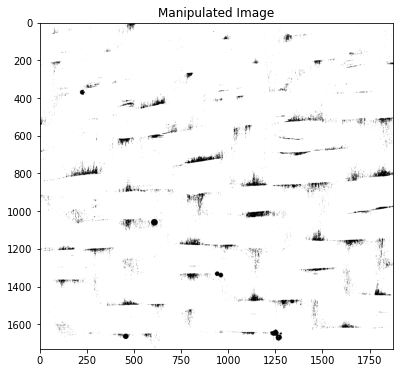

Void Content: 2.39%


<Figure size 432x288 with 0 Axes>

In [29]:
slice0130_path = 'slice_0130.jpeg'
slice0130 = cv2.imread(slice0130_path, cv2.IMREAD_GRAYSCALE)
void_content, thresholded = calculate_void_content(slice0130)
plt.figure(figsize=(10, 6))
plt.imshow(thresholded, cmap='gray')
plt.title('Manipulated Image')
plt.show()
plt.savefig('void.png')
print(f"Void Content: {void_content:.2f}%")

Comment:

#### Question 6.2: Now expand your previous code and apply the same technique to estimate the overall void volume content (in 3D) of the laminate. The folder provided with this notebook contains 107 slices obtained with microtomography. Using your algorithm from question 6.1 calculate the void content of each slice and report all the values in a single graph as a function of the slice number. Finally, calculate the average void content (in 3D) and comment on the difference/similarity with your answer in question 6.1. 
#### Please also comment on the applicability of 2D void content measurements to represent the overall void content of a product.

In [38]:
def process_folder(folder_path):
    void_contents = []
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]
    image_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        void_content, thresholded = calculate_void_content(image)
        void_contents.append(void_content)

    return void_contents

In [39]:
def plot_void_contents(void_contents):
    plt.figure(figsize=(10, 6))
    plt.plot(void_contents, linestyle='-', color='b')
    plt.title('Void Content Across Slices')
    plt.xlabel('Slice Number')
    plt.ylabel('Void Content (%)')
    plt.xlim(0, 107)
    plt.ylim(1.5, 3.5)
    plt.grid(True)
    plt.show()

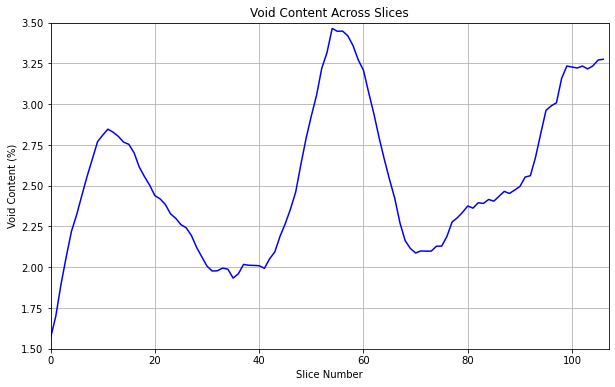

Average Void Content (3D): 2.53%


In [40]:
def main():
    folder_path = os.path.join(os.getcwd(), "Slices")
    void_contents = process_folder(folder_path)
    plot_void_contents(void_contents)
    average_void_content = np.mean(void_contents)
    print(f"Average Void Content (3D): {average_void_content:.2f}%")

if __name__ == "__main__":
    main()

#### Question 6.3: What are the primary characterization techniques employed for void content evaluation? List three techniques. Could you outline the advantages and disadvantages of each technique? Additionally, which of these techniques, and any others covered in lectures, can be applied proactively (ex ante) to prevent void formation?

#### Question 6.4: Image analysis on the image provided above (Figure 8, question 6.1) can also be useful to obtain an estimation of fibre volume fraction and matrix content.
#### To do this, first obtain and display the histogram of the woven fabric laminate, manipulate the initial image to obtain a better thresholding and describe what you did in terms of manipulation of the image, display the newly obtained histogram and then use this data to quantify the fibre and matrix content for the image provided.
#### Finally, comment on the fibre volume content you obtained.

In [41]:
def display_histogram(slice0130, title):
    hist = cv2.calcHist([slice0130], [0], None, [256], [0, 256])
    plt.figure(figsize=(10, 6))
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

In [42]:
def manipulate_slice0130(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

In [43]:
def fmcontent(clean_image):
    fibrecont = np.count_nonzero(clean_image == 255)
    matrixcont = np.count_nonzero(clean_image == 0)
    total_pixel = fibrecont + matrixcont
    fibrecontper = (fibrecont / total_pixel) * 100
    matrixcontper = (matrixcont / total_pixel) * 100
    return fibrecontper, matrixcontper

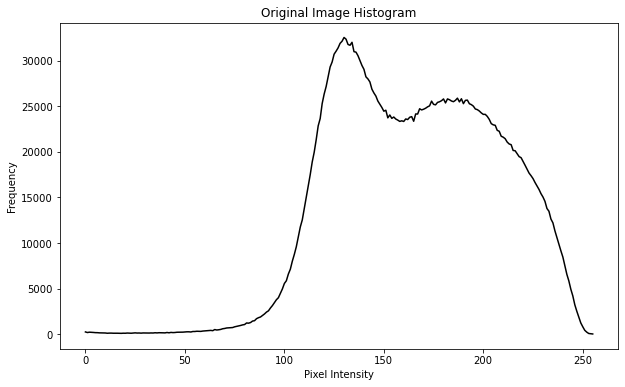

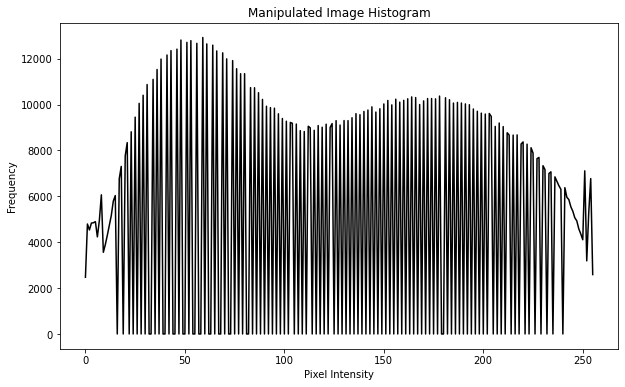

In [ ]:
image_path = 'slice_0130.jpeg' 
slice0130 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
display_histogram(slice0130, 'Original Image Histogram')
height, width = slice0130.shape
max_display_height = 1080
scaling_factor = max_display_height / height
resized_slice0130 = cv2.resize(slice0130, (int(width * scaling_factor), max_display_height))
manipulated_slice0130 = manipulate_slice0130(resized_slice0130)
cv2.imshow('Manipulated Image', manipulated_slice0130)
display_histogram(manipulated_slice0130, 'Manipulated Image Histogram')
cv2.waitKey(0)
cv2.destroyAllWindows()
_, clean_slice0130 = cv2.threshold(manipulated_slice0130, 120, 255, cv2.THRESH_BINARY)
fiber_content, matrix_content = fmcontent(clean_slice0130)
print(f"Fiber Content: {fiber_content:.2f}%")
print(f"Matrix Content: {matrix_content:.2f}%")

Comment:

## Question 7 (4 points)

#### As it was mentioned at the beginning of the 'Voids' section, defects in composites have implications on the mechanical performance of the composite structure. In the next question, you will analyze two Force-Strain datasets for two similar samples. The samples are joined through continuous ultrasonic welding. Their cross-sectional micrographs are displayed below, and can be seen in Figure 9 and 10 respectively.
<img src="SLS_yes.jpg" width="400" height="240"> 

Figure 9

<img src="SLS_no.jpg" width="400" height="240">

Figure 10
#### Question 7.1: Examine Figure 9 and 10. One of these images shows a consolidated sample, the other one shows a defective sample. Please explain which figure belongs to which sample. Also provide a small discussion on the expected differences, and why these differences would occur.

Check file name for answer

#### Question 7.2: Attached are two datasets of Single Lap Shear tests, both with identical test settings. Each dataset contains the results of 5 samples. One of the datasets is derived from a reasonably well consolidated sample, while the other dataset coming from a defective sample. Plot and analyze the Stress-Strain graphs. Conclude which of the sets is of the defective sample, and explain the difference in plotted curves.

In [18]:
def read_normal(file_path):
    data = pd.read_excel(file_path)
    strain_columns = [f's{i}' for i in range(1, 6)]
    force_columns = [f'f{i}' for i in range(1, 6)]
    j = 0
    k = 1
    for i in range(5):
        strain_column = data.iloc[:, j]
        force_column = data.iloc[:, k]
        data[strain_columns[i]] = strain_column / 100
        data[force_columns[i]] = force_column / 322.58
        j = j+2
        k = k+2
    return data[strain_columns], data[force_columns]

In [19]:
def plot_data(samples, title, save_path):
    plt.figure(figsize=(10, 6))    
    for i, sample in enumerate(samples):
        for j in range(5):
            label = f'Sample {i + 1}.{j + 1}'
            plt.plot(sample[0].iloc[:, j], sample[1].iloc[:, j], label=label, linewidth=2)
    plt.legend()
    plt.ylabel('Stress [$N/mm^2$]')
    plt.xlabel('Strain')
    plt.title(title)
    plt.grid()
    plt.show()

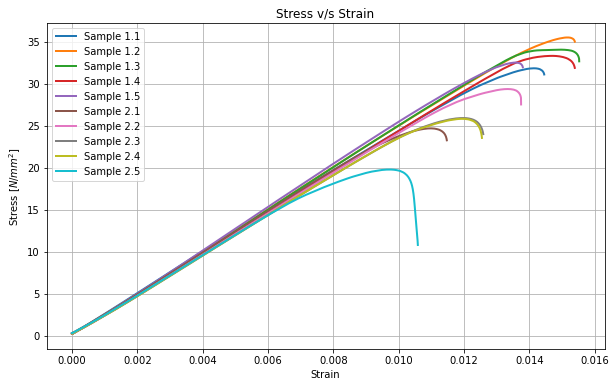

In [20]:
s_1, f_1 = read_normal('Weld1Cons.xlsx')
s_2, f_2 = read_normal('Weld2Cons.xlsx')
samples = [(s_1, f_1), (s_2, f_2)]
plot_data(samples, 'Stress v/s Strain', 'Q72.png')

In [21]:
def calculate_slope(x_values, y_values, cut):
    slope, _ = np.polyfit(x_values[:cut], y_values[:cut], 1)
    return slope

In [22]:
for i in range(5):
    slope_1 = calculate_slope(s_1[f's{i+1}'], f_1[f'f{i+1}'], 30)
    print(f'Elastic Modulus for Sample 1.{i+1}: {round((slope_1),2)}')

Elastic Modulus for Sample 1.1: 1976.19
Elastic Modulus for Sample 1.2: 1969.44
Elastic Modulus for Sample 1.3: 1964.88
Elastic Modulus for Sample 1.4: 1957.71
Elastic Modulus for Sample 1.5: 2051.61


In [23]:
for i in range(5):
    slope_2 = calculate_slope(s_2[f's{i+1}'], f_2[f'f{i+1}'], 40)
    print(f'Elastic Modulus for Sample 2.{i+1}: {round((slope_2),2)}')

Elastic Modulus for Sample 2.1: 1844.81
Elastic Modulus for Sample 2.2: 1970.38
Elastic Modulus for Sample 2.3: 1870.95
Elastic Modulus for Sample 2.4: 1835.78
Elastic Modulus for Sample 2.5: 1938.44


#### Question 7.3: From your results of Q7.2, you should be able to derive that the elastic moduli are approximately similar for all samples. Explain why this is the case.